<a href="https://colab.research.google.com/github/taarusshwd/Face-Mask-Identifier/blob/main/COVID_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model For Detecting Face Masks in Static Images


### Importing all the necessary libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

### Downloading the dataset directly from Kaggle

 

For downloading the dataset from kaggle, we need the kaggle API key.   
Follow [this tutorial](https://www.youtube.com/watch?v=tGw-ZACouik) to get the Kaggle username and key.

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='taarusshwadhwa'
os.environ['KAGGLE_KEY']='f2ef5c63de2d4d9d7d2f5b93735d0395'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:09<00:00, 35.1MB/s]
100% 207M/207M [00:09<00:00, 22.7MB/s]


Whenever we download a dataset from kaggle directly, it is always in the .zip format. We need to unzip this folder to access all the images of our data. 

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

### Declare all the paths for easier access to the respective datasets later on.  

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
validation_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0693.jpg', '1562.jpg', '1515.jpg', '1518.jpg', '1195.jpg', '1067.jpg', '0110.jpg', '0769.jpg', '0639.jpg', '1040.jpg']
['340.jpg', '253.jpg', '240.jpg', '351.jpg', '130.jpg', '151.jpg', '223.jpg', '97.jpg', '218.jpg', '329.jpg']


### Visualising Images

We will be visualising 16 images each from the training set:
* 8 images with masks
* 8 images without masks 

['/content/New Masks Dataset/Train/Mask/0693.jpg', '/content/New Masks Dataset/Train/Mask/1562.jpg', '/content/New Masks Dataset/Train/Mask/1515.jpg', '/content/New Masks Dataset/Train/Mask/1518.jpg', '/content/New Masks Dataset/Train/Mask/1195.jpg', '/content/New Masks Dataset/Train/Mask/1067.jpg', '/content/New Masks Dataset/Train/Mask/0110.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg']
['/content/New Masks Dataset/Train/Non Mask/340.jpg', '/content/New Masks Dataset/Train/Non Mask/253.jpg', '/content/New Masks Dataset/Train/Non Mask/240.jpg', '/content/New Masks Dataset/Train/Non Mask/351.jpg', '/content/New Masks Dataset/Train/Non Mask/130.jpg', '/content/New Masks Dataset/Train/Non Mask/151.jpg', '/content/New Masks Dataset/Train/Non Mask/223.jpg', '/content/New Masks Dataset/Train/Non Mask/97.jpg']


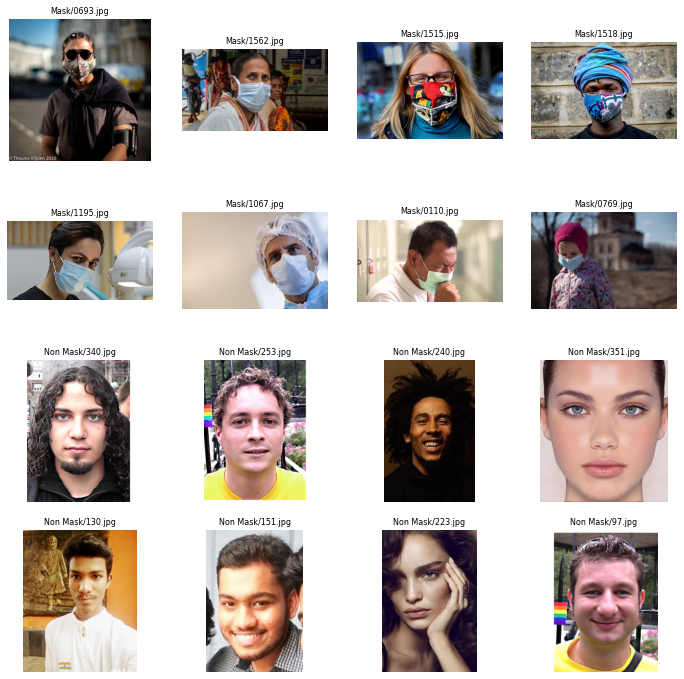

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic=[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic=[]
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=8)
  plt.imshow(image, cmap='Blues')

### Data Augmentation

The total number of images in the training set is only 600 images. We want to increase our training set to improve the accuracy of our model.  
To do this, we are flipping each of the images in the training dataset horizontally, amongst other operations. 
We can also, zoom in to a particular picture, blur it out, flip it vertically etc.  
Read up more on Data Augmentation to understand it's purpose and impact. 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                    )

val_generator = val_datagen.flow_from_directory(validation_dir,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='binary'
                                                )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### Building our CNN Model

The model we'll be using has been explained with the help of a flow diagram below.  

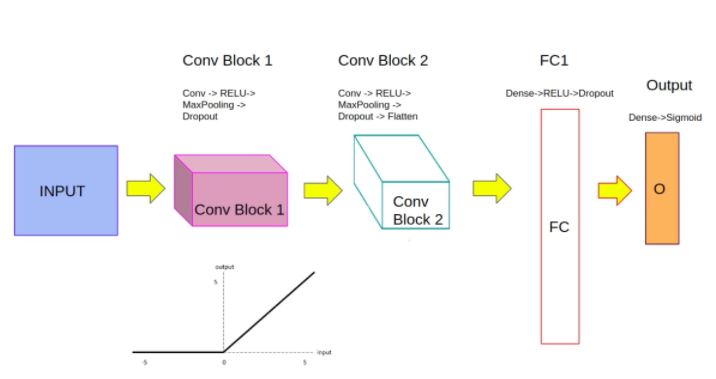

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

Compile the built model to configure it for training. 

In [ ]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### Train the CNN Model

In [ ]:
history = model.fit(train_generator, 
                    epochs = 30,
                    validation_data = val_generator)

Epoch 1/30
19/19 [==============================] - 14s 750ms/step - loss: 3.8265 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 13s 699ms/step - loss: 0.6913 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 3/30
19/19 [==============================] - 13s 705ms/step - loss: 0.6544 - accuracy: 0.6333 - val_loss: 0.6683 - val_accuracy: 0.6601
Epoch 4/30
19/19 [==============================] - 14s 721ms/step - loss: 0.5140 - accuracy: 0.7667 - val_loss: 0.5301 - val_accuracy: 0.7778
Epoch 5/30
19/19 [==============================] - 14s 716ms/step - loss: 0.3902 - accuracy: 0.8417 - val_loss: 0.3477 - val_accuracy: 0.8922
Epoch 6/30
19/19 [==============================] - 14s 712ms/step - loss: 0.3735 - accuracy: 0.8667 - val_loss: 0.3518 - val_accuracy: 0.8693
Epoch 7/30
19/19 [==============================] - 13s 710ms/step - loss: 0.3184 - accuracy: 0.8917 - val_loss: 0.3438 - val_accuracy: 0.8562

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Evaluating the CNN Model

Below, we plot the Training vs Validation Loss and Training vs Validation Accuracy.  
If the distance between the two curves is substantial, the model is not acceptable. 

Text(0.5, 0, 'epoch')

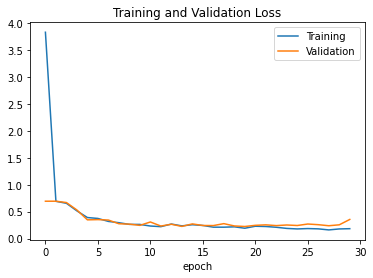

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

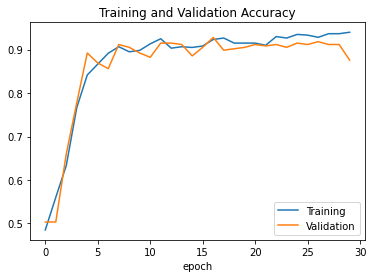

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

### Evaluating our CNN Model

First, we evaluate the CNN Model on our test dataset. 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('test loss:{} test accuracy:{}'.format(test_loss, test_accuracy))

4/4 [==============================] - 1s 261ms/step - loss: 0.3738 - accuracy: 0.8300
test loss:0.3738428056240082 test accuracy:0.8299999833106995


We achieved an accuracy of 83%. However, this can still be improved. Perhaps adding more images to the training set would help, or maybe tuning some hyperparameters may improve the accuracy on the test set as well. 

Next, we will test our model on pictures of our own choice.  
We can upload the pictures from our device using the colab function. 

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('Mask!')
  else:
    print('No Mask!')

Saving nomask.jpeg to nomask (1).jpeg
Saving mask_2.jpg to mask_2 (1).jpg
Saving mask_1.jpg to mask_1 (1).jpg
nomask.jpeg
No Mask!
mask_2.jpg
Mask!
mask_1.jpg
Mask!


The model was able to predict accurately.  
We will use this model in another python function where we will use OpenCV to detect face masks in a video.  
As our last step, let's save this model which we can download. 

In [ ]:
model.save('model.h5')

All the related material and resources are available on my [Github](https://github.com/taarusshwd/Face-Mask-Identifier). 